http://www.axel-dreher.de/Dreher%20et%20al._Aid_China_Growth.pdf



--- 
Project for the course in Microeconometrics / OSE Data Science | Summer 2021, M.Sc. Economics, Bonn University | [Jonathan Willnow](https://github.com/JonathanWillnow)

# Replication of Dreher et. al (2020): Aid, China, and Growth: Evidence from a New Global Development Finance Dataset  <a class="tocSkip">   
---
    
   

The aim of this notebook is to replicate the following paper:

> Dreher et. al (2021): Aid, China, and Growth: Evidence from a New Global Development Finance Dataset. American Economic Journal: Economic Policy, vol. 13(2), may 2021 (pp. 135-74).


##### Downloading and viewing this notebook:

* The best way to view this notebook is by downloading it and the repository it is located in from [GitHub](https://github.com/OpenSourceEconomics/ose-data-science-course-project-JonathanWillnow). Other viewing options like _MyBinder_ or _NBViewer_ may have issues with displaying images or coloring of certain parts (missing images can be viewed in the folder [files](https://github.com/OpenSourceEconomics/ose-data-science-course-project-JonathanWillnow) on GitHub).


* The original paper, as well as the data and code provided by the authors can be accessed [here](https://www.aeaweb.org/articles?id=10.1257/pol.20180631).

##### Information about replication and individual contributions:

* For the sake of readability and comprehensibility, I try to adopt the original structure of the paper. This enables readers to easily follow the notebook and compare it to the paper. The tables and figures of this notebook are named and labeled as they appear in Dreher et. al (2021)


* As the replication of the paper progresses, I keep adding independently extensions (or deviate from the methodology of the authors). In order to clearly delineate this sections from the replication, all these sections are indicated as _extensions_. 


# Table of Contents

### Library imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib.pyplot as plt
import geopandas 
import linearmodels as lm
import itertools as tools
import scipy.stats as scipy
from IPython.display import HTML

In [2]:
from auxiliary.auxiliary_predictions import *
from auxiliary.auxiliary_plots import *
from auxiliary.auxiliary_regressions import *

#from auxiliary.example_project_auxiliary_tables import *


# 1. Introduction

The Belt and Road Initiative (BRI), better known as The "new silk road initiative" is just one of many instances of China´s overseas activities of financing development, especially known to the europeans. Other projects, mostly infrastructure projects (by transaction value), link China within Asia and with the African continent. This role of China as significant donor raises strong opinions, but the debate was based on only little facts since most of the details are not officially reported. The paper at hand uses the Tracking Underreported Financial Flows (TUFF) methodology to introduce a new dataset that provides the needed evidentiary foundations that was needed for this issue.

Dreher et. al adress two questions: 

* Does Chinas financial development finance led to economic growth?
* Does Chinas finance undermine the effectivness of western development finance?

+ Argumente??!!

To answer this question on whether and how Chinese development finance affects economic growth, instrumental vriabales are employed that make use of the year-to-year changes in the supply of Chinese development finance (which will be introduced) in tandem with cross-sectional variation which is determined by the probability that countries receive such funding.

# 2. The Tracking Underreported Financial Flows (TUFF) methodology

The data set is constructed using the Tracking Underreported Financial Flows (TUFF) methodology which codifies a set of open source data collection procedures in a systematic, transparent and replicable way. This methodology was origionally developed by Strange et. al(2012) in collaboration with AidData, a research lab at William and Mary and has been used and improved many times (for p.62). It enables us to identify detailed financial, locational and even operational informations about officially financed projects that are NOT recorded by the donors and lenders (here China) through the international reporting systems, like the OECD’s Creditor Reporting System (CRS) or the International Aid Transparency Initiative (IATI).

Since the authors of the paper address the relevance of this methodology many times and the constructed data set is unique in its range and accuracy, we will briefly explore the TUFF methodology. 

### First Stage
This represents the stage of primary data collection. All recorded projects of interest were collected. In parallel, potential projects at the donor/lender-recipient/borrower-year unit got identified and collected by a standartizied set of search querries. The database of choice for this dataset is the media database Factivia wich collects newspapers, radio and television transcript worldwide in 28 languages. This set of documents is then filtered using a machine learning algorithm, trained with large amounts of past identified and classified documents. A subset of documents is determined which are most likely to contain information on officially by china financed projects. Each object of the subset was then reviewed by the team and assessed whether it contained the information or not.

### Second Stage
The so gathered set of documents is then subject to a second review and augmention to validate/ invalidate it and potentionally add to the project informations in order to improve the accuracy and scope. This is performed by native speakers and language experts. For this specific dataset, the researchers also collected informations from entities like the private contractors of the projects, experts with specific tacit knowledge for specific projects and also involved external reviewers that did fildwork on a specific project or country. As a measure of validity, the researchers calculate sytematically triangulation and completness scores for each project. This triangulation and the related score achives a higher validity and reduced systematic risk, but also avoids the over-reliance on Factivia.

### Third Stage
The aim of this stage is to maximize the reliability and completeness of the records on the individual projects by quality assurance procedures. This involves the identification and correcting of inconsistent coding e.g caused by different categorized standarts, several de-duplication procedures and the vetting of each individual project record by higher ranking researchers as this whole process involves `HOWMANY?` researchers and assistants. All projects with poor records and relativly high transaction value get indentified by the triangulation and completeness scores and undergoe another review.
Finally the constructed dataset gets peer-reviewed by internal and external reviewers. For this specific dataset, more than 30 external and interbal reviewers were involved.


---
<span style="color:blue">**NOTE**:</span> More information about AidData´s TUFF Methodology, its development and coder instructions can be found [here](https://www.aiddata.org/publications). This section was based on Strange et. al(2017): AidData's Tracking Underreported Financial Flows (TUFF) Methodology, Version 1.3. Williamsburg, VA: AidData at William & Mary.



---

# 3. Replication

## 3.1 Descriptive statistics & Allocation of Chinese development finance


In [3]:
data1 = pd.read_stata("data/work2_dataset_CDF.dta")
data1.shape

(4304, 61)

The first dataset of Dreher et al(), constructed with the introduced TUFF methodology, covers 4,304 Chinese financed development projects that were commited, implemented or completed between 2000 and 2014 in 138 countries worldwide, based on 15,500 unique sources of information as described above. As can be seen by the output, it contains 61 columns that describe the 4,304 projects.


### 3.1.1 The distribution of project types

The authors distinguishes between three different categories of development financing:

* ODA-like projects for the promotion of economic or social development, provided at OECD-DAC level of concessionality,
* OOF-like projects, non-development purposes like export promotions with insufficient concessionality and
* Vague-OF projects, which cannot be proplerly categorized because f insufficient information at hand

The Dataset not only allows us to look at the number of projects, but it is also possible to divide the projects into the three classes by their financial value: 


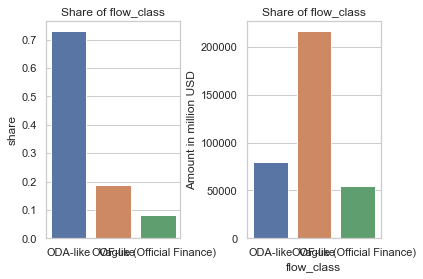

In [4]:
flow_class_df = flow_class_plot(data1)

The acutal distribution of Chinese financial development finance:

In [5]:
flow_class_df

,flow_class,Share,Amount in USD
0,ODA,0.729554,7.957558e+04
1,OOF,0.187965,1.879647e-07
2,Vague,0.082481,5.471114e+04


As the plot indicates and the dataframe varifies, the majority of projects are ODA-like projects (73%) with a OECD-DAC level of concessionality. When we shift the focus of the analysis to the financial value, these 73% of total rojects only account for roughly 22% of the total financial amount. The majority of Chinese financing is OOF-like. By the charackter of the OOF-like projects (export promotions,...) this high financial value might already indicate that the Chinese use development finance first and foremost as a mean to help themselves.

### 3.1.2 Sectoral distribution 

The dataset contains the OECD-DAC sector classifications of each coded project.

Again, it is important to distinguish between the number of projects per sector and the financial value of development finance that the Chinese Governemnt invests in this sector. The two plots indicate that by far the most fimancial value is invested in the sectors of ernergy, followed by transportation and industry, mining and construction. While looking at the project count, the picture is completly different: Most projects are in the health-, education- and governance sector, but do only account for arround 2% of the total financial value of chinese development finance.

All projects of the health-, education and governance sector account for 2.69%,
whereas the energy-, transportation and industry/mining sector accounts for 71.50%


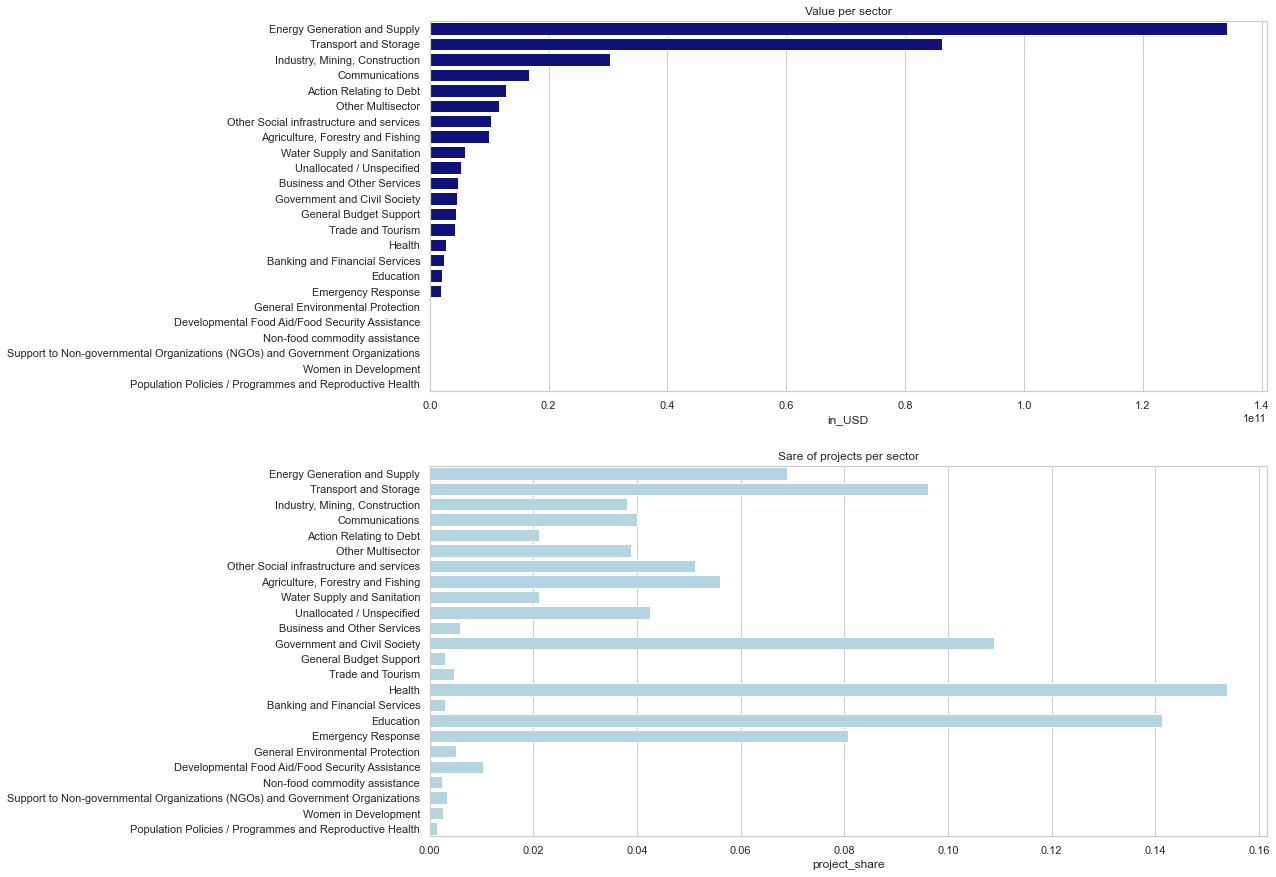

In [6]:
sectoral_plot(data1)

From this first two plots of descriptive statistic, it indicates that the projects within sectors with a low financial value are mostly ODA like projects. In contrast, the chinese government prefers OOF-like projects when it comes to bigger financial values in terms of USD.

In the following you can have a look at the individual shares of project types in the different sectors:


In [7]:
def explore_sectors(data):
    sector = "Transport and Storage"
    #### Please delete the comment in [4] for this function to properly work
    #sector = input("Enter sector name (as in the plot above): ")
    try:
            val = str(sector)
    except (ValueError, KeyError):
            print("One more try: Enter a valid sector \n Try again:")
            sector = input("Enter sector name (as in the plot above): ")

    stats = data[data.crs_sector_name == val].flow_class.value_counts(1).to_frame("Percentage");
    stats.Percentage = round(stats.Percentage,2)*100
    stats["Absolute"] = data[data.crs_sector_name == val].flow_class.value_counts()
    try:
        stats.loc[0]
        return stats;
    except:
        print("\nError! Please try this again. Example for input: Transport and Storage")
    

In [8]:
explore_sectors(data1)


Error! Please try this again. Example for input: Transport and Storage


### 3.1.3 Finance form of projects

In [9]:
data1.flow_class.unique()

array(['ODA-like', 'OOF-like', 'Vague (Official Finance)'], dtype=object)

In [10]:
def financeform_plot(data):
    sns.set_theme(style="whitegrid")
    
    f, axs = plt.subplots(3,1, figsize = (12,12))
    plt.subplots_adjust(wspace=0.25)

    plt.subplot(311)
    ODA_like = data[data.flow_class == "ODA-like"].flow.value_counts()
    ax = sns.barplot(y=ODA_like.index, x=ODA_like.values)
    ax.set_title("Financeform of ODA-like projects");
    
    plt.subplot(312)
    OOF_like = data[data.flow_class == "OOF-like"].flow.value_counts()
    ax = sns.barplot(y=OOF_like.index, x=OOF_like.values)
    ax.set_title("Financeform of OOF-like projects");
    
    plt.subplot(313)
    Vague_like = data[data.flow_class == "Vague (Official Finance)"].flow.value_counts()
    ax = sns.barplot(y=Vague_like.index, x=Vague_like.values)
    ax.set_title("Financeform of Vague official financed projects");
    plt.tight_layout(pad=2.5);
    
    #sns.set_theme(style="whitegrid")
    #ax = sns.barplot(y = data.flow.value_counts().index, x = data.flow.value_counts().values, color = "blue")

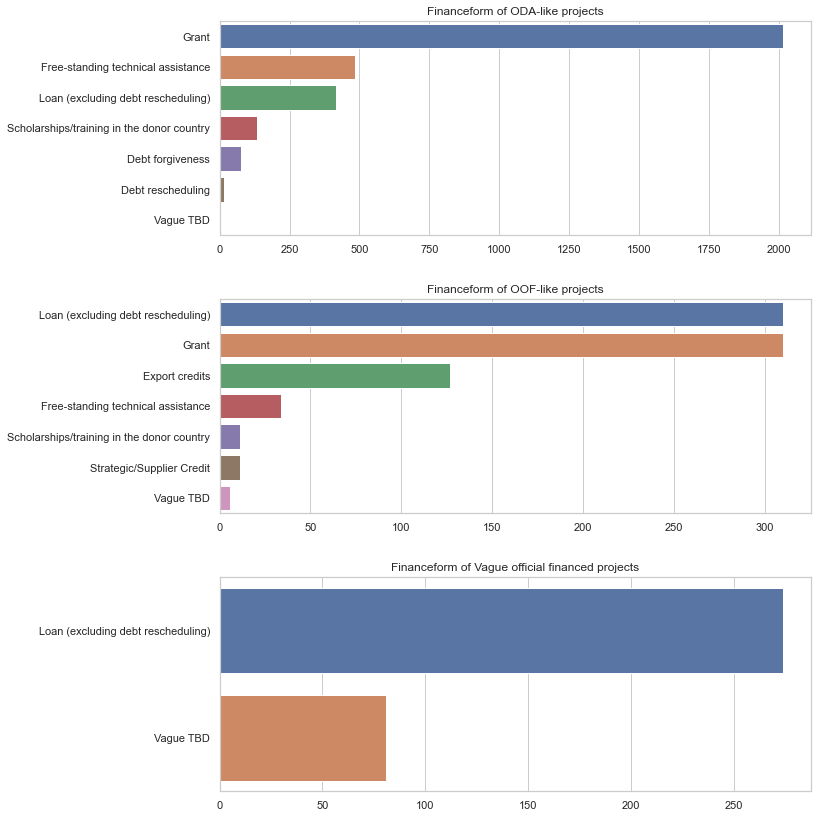

In [11]:
financeform_plot(data1)

### 3.1.4 Cross-country distribution of Chinese development finance


When looking at the cross-country allocation of the total number of Chinese development finance, the results are consistent with the conventional wisdom of reading the newspaper as well as with academic sources

Out of the top ten recipient countries, seven recipient countries are from the african continent.

In [12]:
data1.all_recipients.value_counts().sort_values(ascending = False)[:10]

Cambodia     168
Pakistan     121
Zimbabwe     120
Angola       110
Sudan        108
Tanzania     101
Ghana         95
Kenya         89
Ethiopia      88
Sri Lanka     86
Name: all_recipients, dtype: int64

The cross-country allocation in terms of financial value invested in the recipient country however paints a different picture with Russia as the number one recipient of chinese development finance. It becomes clear

In [13]:
data1.groupby("all_recipients").usd_defl.sum().sort_values(ascending = False)[:10]

all_recipients
Russia          3.662258e+10
Pakistan        2.432477e+10
Angola          1.655638e+10
Ethiopia        1.483371e+10
Sri Lanka       1.268011e+10
Laos            1.201567e+10
Venezuela       1.121902e+10
Turkmenistan    1.067643e+10
Sudan           1.023677e+10
Ecuador         9.952516e+09
Name: usd_defl, dtype: float64

The following plot is meant to summarize the cross-country allocation of the chinese development finance. In order to visualize the plot, a second .dta file is needed which contains similar informations as the previous dataset, but also includes tools to clearly identify countries in seven different ways. 

In [14]:
world_plot_data = pd.read_stata("data/map_1yw_merge.dta")
#world_plot_data.sort_values(by = "OFa_all_con", ascending = False)[:5]

Again we can distinguish between the project count (probaid_PRC_OFn_all) which is expressed as share of years in the 2000-2014 period that country $i$ has received Chinese development finance and the financial amount (OFa_all_con) that the country received.

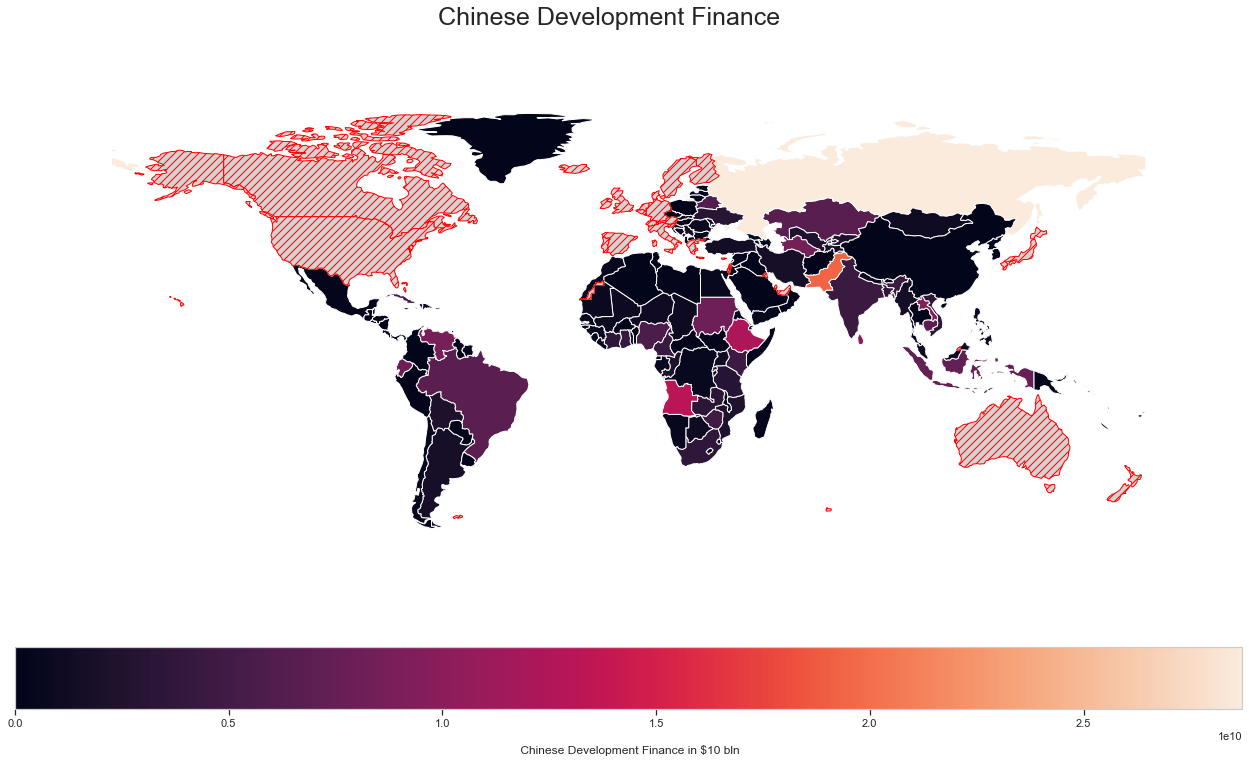

In [15]:
#try it out!
#worldplot_2(world_plot_data, "recipient_iso3", "probaid_PRC_OFn_all")
worldplot_2(world_plot_data, "recipient_iso3", "OFa_all_con")


## 3.2 Factors that determined allocation of Chinese development finance

Lets focus on the factors that are relevant for the allocation of Chinese development finance:

* First, I will extend the paper and reproduce the findings using simple but highly interpretable desriptive statistics as they provide a simple but well elaborated view on this issue. This aims also towards giving the reader of this notebook a better understanding of the variables that are relevant for the allocation without setting up mixed effect models

* Afterwards I will follow the authors and provide mixed effect models as well as panel-data models.

For the following part, we need a third dataset. This dataset contains all the factors that the authors thought could have an relevant effect on the allocation of the Chinese development finance.
Variables are coded for a given country and a given year. Some variables start earlier than in the year 2000, which is due to the lagged charackter of some variables of interest in the dataset.



In [16]:
def get_data3():
    # Data preperation for the following part
    data3 = pd.read_stata("data/AEJ2020 allocation.dta")
    ######

    # prepare data
    # we have to include 1 year lag and 3 year lagg
    # since we have panel data, skip(does not work so we have to do it manually)
    years = ["2000-01-01","2001-01-01","2002-01-01","2003-01-01","2004-01-01","2005-01-01","2006-01-01","2007-01-01",
              "2008-01-01","2009-01-01","2010-01-01","2011-01-01","2012-01-01","2013-01-01", "2014-01-01"]

    # factor1 : 0,452441 = 1997
    factors = data3.factor1.unique()
    reserves = data3.det_reservesCHN_con.unique()

    data3["factor1_1"] = np.nan
    data3["factor1_3"] = np.nan
    data3["det_reservesCHN_con_1"] = np.nan
    data3["det_reservesCHN_con_3"] = np.nan

    for year, factor in zip(years, factors[3:]):
        data3.factor1_1.loc[data3.year == year] = factor

    for year, factor in zip(years, reserves[3:]):
        data3.det_reservesCHN_con_1.loc[data3.year == year] = factor

    for year, factor in zip(years, factors[1:16]):
        data3.factor1_3.loc[data3.year == year] = factor

    for year, factor in zip(years, reserves[1:16]):
        data3.det_reservesCHN_con_3.loc[data3.year == year] = factor

    # Now Drop missing values and return to 2000-2014 period
    data3 = data3[data3.year >= "2000-01-01"].copy()
    data3.replace([np.inf, -np.inf], np.nan, inplace=True);
    data3 = data3.dropna(0)

    
    return(data3)

In [17]:
data3 = get_data3();
data3.head()

C:\Users\Jonathan\anaconda3\envs\student_project\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,code,year,countryname,OFn_all,OFn_oda,OFn_oofv,prob_PRCaid_2000,factor1,OFa_all_con,OFa_oofv_con,...,A_LIconcor,A_disaster_ln,A_Ltrade_con_ln,A_Lunsc,A_LINLINECHN,A_Lenglish,factor1_1,factor1_3,det_reservesCHN_con_1,det_reservesCHN_con_3
39,AGO,2000-01-01,Angola,1.0,1.0,0.0,0.066667,-1.642051,0.000000e+00,0.000000e+00,...,-1.417777,11.279757,19.956806,0.0,0.98113,0.0,-1.056065,0.452441,-0.121037,-0.080115
40,AGO,2001-01-01,Angola,2.0,2.0,0.0,0.066667,-1.509742,1.084596e+06,0.000000e+00,...,-1.516698,10.608267,21.552462,0.0,0.97436,0.0,-1.642051,-0.201432,-0.119968,-0.121920
41,AGO,2002-01-01,Angola,9.0,8.0,1.0,0.066667,-1.294446,2.638178e+08,0.000000e+00,...,-1.326816,3.583519,20.636229,0.0,1.00000,0.0,-1.509742,-1.056065,-0.067196,-0.121037
42,AGO,2003-01-01,Angola,1.0,1.0,0.0,0.066667,-0.930074,1.927031e+07,0.000000e+00,...,-1.136933,6.723832,21.023651,0.0,1.00000,0.0,-1.294446,-1.642051,-0.032252,-0.119968
43,AGO,2004-01-01,Angola,3.0,1.0,2.0,0.066667,-0.207976,8.831566e+07,8.831566e+07,...,-1.303790,12.790635,21.720728,1.0,0.98148,0.0,-0.930074,-1.509742,-0.008290,-0.067196



### 3.2.1 Extension - Descriptive Plots

I decided to add this extension since the following descriptive plots provide a simple but powerful insight without setting up any sort of models. The plots are divided into violinplots (for binary variables) and scatterplots (for quantitative variables) for selected variables of the dataset. Violinplots are great here since they allow to compare the peaks, valleys, and tails of the density curve between the plots in order to detect similarities and differences.

For the selection of the variables in the plots, I followed the authors of the paper, who followed aid allocation literature. All variables are plotted against the the financial amount of Chinese development aid  in a given country and year as well as against the project count of a given country and year.

##### Qualitative variables
* *A_D99petroleum*, indicates wheter a recipient country produces Oil,
* *A_Ltaiwanr*, whether a recipient recognizes the Taiwan government
* *A_Lenglish*, official language is english


##### Quantitative Variables
* *A_LINLINECHN*, voting alignment in the UN General Assembly,
* *A_LDebtGDP*, recipient countries debt,
* *A_Lpopulation_ln*, population size, log,
* *A_Lpolity2*, policy score of country




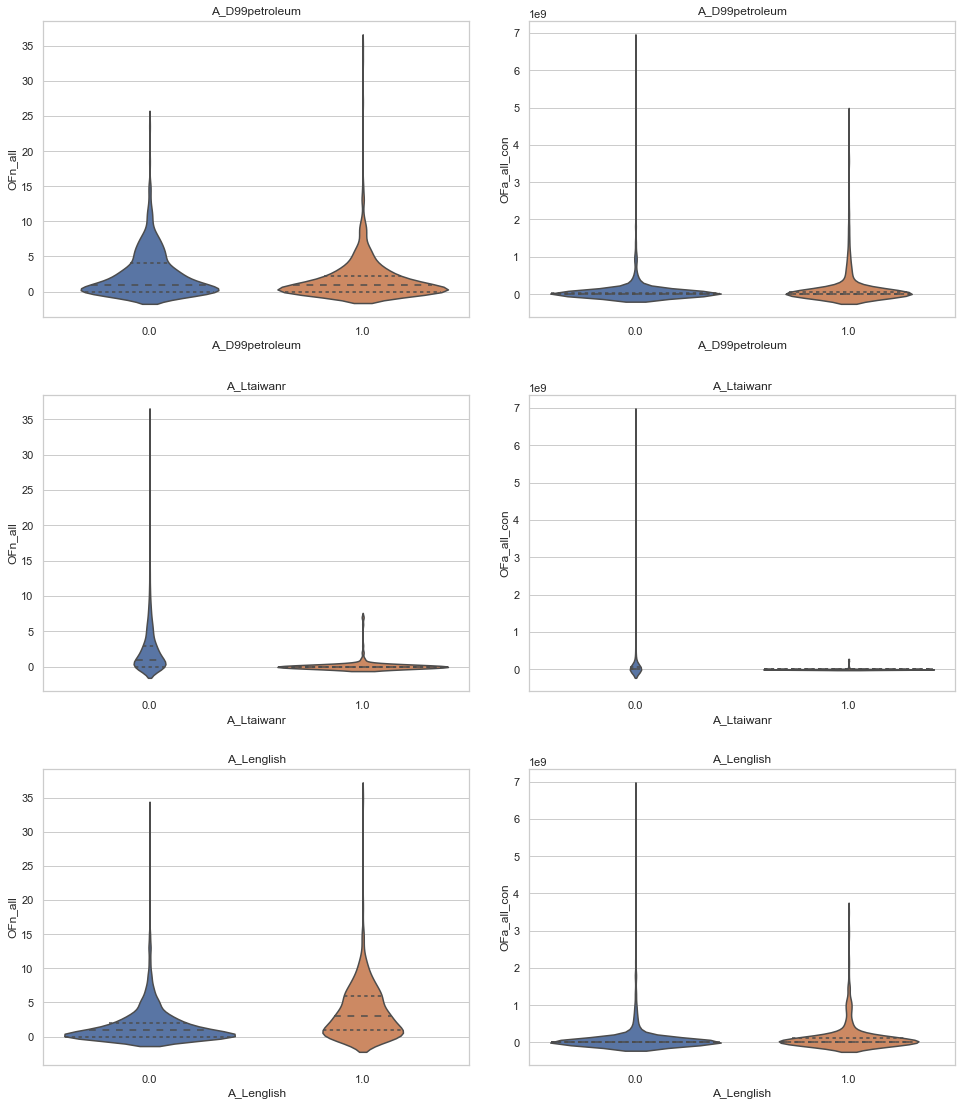

In [18]:
columns_of_interest = ["A_D99petroleum","A_Ltaiwanr","A_Lenglish"]
quali_descriptive_plots(data3,columns_of_interest)

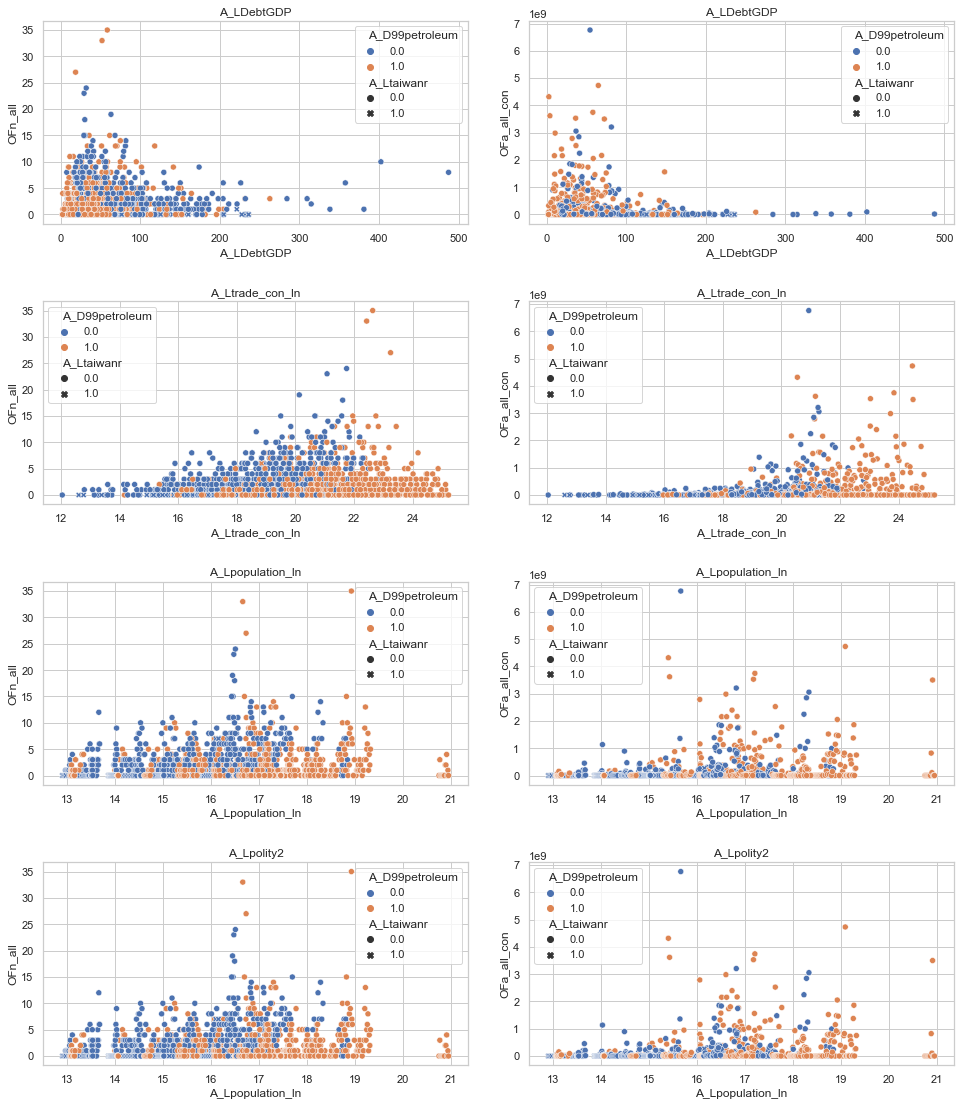

In [19]:
columns_of_interest_scatter = ["A_LDebtGDP","A_Ltrade_con_ln","A_Lpopulation_ln","A_Lpolity2"]
quanti_descriptive_plots(data3,columns_of_interest_scatter)

**From this simple plots we can already draw some initial conclusions, which of course still need to be verified.**

To give an example of the interpretation here: Looking at the violinplot that plots the binary variable wheter a country us a oil producer (AD99_pertolum) against the number of projects for a given country and year we see that the Interquartile Range (50% of obervations) for not being a oil producer is larger than for oil producers, indicating that not being an oil producer is relevant for the allocation of Chinese development projects, allthough there are some outliers for oil producing countries that distort the picture. Furthermore we can compare the thickness of the plots which is indicating the underlying density cuve. For the given example, it follows that there are more oil-producing countries in a given year that receive no projects than not oil-producing countries.
Looking at all the violin plots we can observe that all our variables of interest seem to be higher related to the number of projects that a country recieves in a given year than to the financial amount of those projects. This observation is also confirmed when looking at the quantitative varibales in the scatterplot.

Overall, it seems that most of the described variables are associated with the allocation of Chinese development finance. But while looking at the plots for population size and the policy score, there seems to be no clear relationship with thethe number of projects nor the financial amount.  

To investigate this initial conclusions further we will follow the authors and introduce mixed effect models.

### 3.2.2 Mixed effect models

Since the authors neither explain their motivation for choosing mixed effect models nor outline their excact model specification , I will outline the intuition behind such models and how I approached this models:

Standart linear models (such as OLS) are best suited when all the observations come from a single homogenouos group without any underlying structur. If we recall the structure of the currently used dataset data3, we have observations belong to nested subgroups within the dataset. This would mean that some of the variance could be explained by the subgroups. So considering differences between those subgroups may leed us to better answers to the question of the relevant factors for allocation.

There are two variables for which we could define such proper subgroups:
* year
* countryname
# Extension here?

In the following, I will partly rebuild Table I which consists out of fixed- and random effect models as well as OLS models. As the authors, I will start with random effect models

In [20]:
data3_lagg = data3.set_index(["countryname", "year"])

First I am going to use  linearmodels PooledOLS. This is just plain OLS that understands that various panel data structures. It is useful as a base model.

In [21]:
exog_variables = ["A_LINLINECHN","A_Ltaiwanr","A_Ltrade_con_ln","A_D99petroleum",
                  "A_LDebtGDP","A_Lpolity2","A_Lgdppc_con_ln", "A_Lpopulation_ln","A_Lenglish"]
exog = sm.tools.add_constant(data3_lagg[exog_variables])


mod = lm.panel.PooledOLS(data3_lagg.OFn_all, exog)
mod_pooled = mod.fit()
#print(mod_pooled)

Next, we are setting up the random effects model. Opposed to the pooled OLS model, the random effects model accounts for the structure of the dataset with the two subgroups. The random effects model has substantially effects on the significance of the polity score.

The model fit is fairly similar, although the return to experience has changed substantially, as has its significance. This is partially explainable by the inclusion of the year dummies which will fit the trend in experience and so only the cross-sectional differences matter. The quasi-differencing in the random effects estimator depends on a quantity that depends on the relative variance of the idiosyncratic shock and the common shock. This can be accessed using variance_decomposition.

In [22]:
'''From the documentation of linearmodels: Random effects uses a quasi-demeaning strategy which subtracts the time average
of the within entity values to account for the common shock.'''
    
mod = lm.panel.RandomEffects(data3_lagg.OFn_all, exog)
mod_random = mod.fit()
#print(mod_random)

In [23]:
mod = lm.panel.PanelOLS(data3_lagg.OFn_all, exog, time_effects=True)
mod_fixed = mod.fit()
#print(mod_fixed)

In [24]:
print(lm.panel.compare({"Pooled": mod_pooled, "RE": mod_random, "FE": mod_fixed}, stars = True, precision = "std_errors"))

                            Model Comparison                           
                                Pooled                RE             FE
-----------------------------------------------------------------------
Dep. Variable                  OFn_all           OFn_all        OFn_all
Estimator                    PooledOLS     RandomEffects       PanelOLS
No. Observations                  1551              1551           1551
Cov. Est.                   Unadjusted        Unadjusted     Unadjusted
R-squared                       0.2702            0.1194         0.2426
R-Squared (Within)              0.0551            0.0724         0.0309
R-Squared (Between)             0.5043            0.4403         0.5089
R-Squared (Overall)             0.2702            0.2532         0.2584
F-statistic                     63.409            23.221         54.378
P-value (F-stat)                0.0000            0.0000         0.0000
=====================     ============   ===============   =====

In [25]:
# rebuilding whole table 1
# prob_PRCaid_2000" = OF probability historic


exog_variables = ["A_LINLINECHN","A_Ltaiwanr","A_Ltrade_con_ln","A_D99petroleum",
                  "A_LDebtGDP","A_Lpolity2","A_Lgdppc_con_ln", "A_Lpopulation_ln","A_Lenglish"]
exog = sm.tools.add_constant(data3_lagg[exog_variables])
#1
mod = lm.panel.RandomEffects(data3_lagg.OFn_all, exog)
mod_random1 = mod.fit()
#2
exog_variables = ["factor1_1","A_LINLINECHN","A_Ltaiwanr","A_Ltrade_con_ln","A_D99petroleum",
                  "A_LDebtGDP","A_Lpolity2","A_Lgdppc_con_ln", "A_Lpopulation_ln","A_Lenglish"]
exog = sm.tools.add_constant(data3_lagg[exog_variables])
mod = lm.panel.RandomEffects(data3_lagg.OFn_all, exog)
mod_random2 = mod.fit()

#3
exog_variables = ["det_reservesCHN_con_1","A_LINLINECHN","A_Ltaiwanr","A_Ltrade_con_ln","A_D99petroleum",
                  "A_LDebtGDP","A_Lpolity2","A_Lgdppc_con_ln", "A_Lpopulation_ln","A_Lenglish"]
exog = sm.tools.add_constant(data3_lagg[exog_variables])
mod = lm.panel.RandomEffects(data3_lagg.OFn_all, exog)
mod_random3 = mod.fit()

#4 historic probability?
exog_variables = ["factor1_1","prob_PRCaid_2000","A_LINLINECHN","A_Ltaiwanr","A_Ltrade_con_ln","A_D99petroleum",
                  "A_LDebtGDP","A_Lpolity2","A_Lgdppc_con_ln", "A_Lpopulation_ln","A_Lenglish"]
exog = sm.tools.add_constant(data3_lagg[exog_variables])
mod = lm.panel.RandomEffects(data3_lagg.OFn_all, exog)
mod_random4 = mod.fit()

#5 contempt probability?
exog_variables = ["factor1_1","probaid_PRC_OFn_all","A_LINLINECHN","A_Ltaiwanr","A_Ltrade_con_ln","A_D99petroleum",
                  "A_LDebtGDP","A_Lpolity2","A_Lgdppc_con_ln", "A_Lpopulation_ln","A_Lenglish"]
exog = sm.tools.add_constant(data3_lagg[exog_variables])
mod = lm.panel.RandomEffects(data3_lagg.OFn_all, exog)
mod_random5 = mod.fit()

#6
exog_variables = ["A_LINLINECHN","A_Ltaiwanr","A_Ltrade_con_ln","A_D99petroleum",
                  "A_LDebtGDP","A_Lpolity2","A_Lgdppc_con_ln", "A_Lpopulation_ln","A_Lenglish", "factor1_1"]
exog = sm.tools.add_constant(data3_lagg[exog_variables])
mod = lm.panel.PanelOLS(data3_lagg.OFn_all, exog, entity_effects=True, drop_absorbed=True)
mod_fixed1 = mod.fit();

# 7
exog_variables = ["det_reservesCHN_con_1","A_LINLINECHN","A_Ltaiwanr","A_Ltrade_con_ln","A_D99petroleum",
                  "A_LDebtGDP","A_Lpolity2","A_Lgdppc_con_ln", "A_Lpopulation_ln","A_Lenglish"]
exog = sm.tools.add_constant(data3_lagg[exog_variables])
mod = lm.panel.PanelOLS(data3_lagg.OFn_all, exog, entity_effects= True, drop_absorbed= True)
mod_fixed2 = mod.fit();


print(lm.panel.compare({"RE1": mod_random1, "RE2": mod_random2, "RE3": mod_random3, "RE4" : mod_random4, "RE5":mod_random5},
              stars = True, precision = "std_errors"))
print(lm.panel.compare({"FE1":mod_fixed1, "FE2":mod_fixed2},
              stars = True, precision = "std_errors"))




C:\Users\Jonathan\anaconda3\envs\student_project\lib\site-packages\linearmodels\panel\model.py:1796: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

A_D99petroleum, A_Lenglish

  warnings.warn(


                                            Model Comparison                                           
                                    RE1             RE2             RE3             RE4             RE5
-------------------------------------------------------------------------------------------------------
Dep. Variable                   OFn_all         OFn_all         OFn_all         OFn_all         OFn_all
Estimator                 RandomEffects   RandomEffects   RandomEffects   RandomEffects   RandomEffects
No. Observations                   1551            1551            1551            1551            1551
Cov. Est.                    Unadjusted      Unadjusted      Unadjusted      Unadjusted      Unadjusted
R-squared                        0.1194          0.1365          0.1346          0.1504          0.1825
R-Squared (Within)               0.0724          0.0886          0.0870          0.0909          0.0915
R-Squared (Between)              0.4403          0.4727         

In [26]:
# collapse data to time series of 15 years explaiing totality of Chinese financed projects in any given year
# prepare data


#data3collapse = data3.groupby("year").sum()
data3collapse =data3.groupby("year").sum()
#data3collapse["A_LINLINECHN"] = data3.groupby("year")["A_LINLINECHN"].mean()


exog_variables= ["factor1", "A_LINLINECHN", "A_Lpopulation_ln"]
exog = sm.tools.add_constant(data3collapse[exog_variables])
mod = sm_api.OLS(endog = data3collapse.OFn_all,exog =  exog)
mod_OLS1 = mod.fit()
mod_OLS1.params
#9 
exog_variables = ["det_reservesCHN_con", "A_LINLINECHN", "A_Lpopulation_ln"]
exog = sm.tools.add_constant(data3collapse[exog_variables])
mod = sm_api.OLS(data3collapse.OFn_all, exog)
mod_OLS2 = mod.fit()
mod_OLS2.summary()

#data3collapse.A_LINLINECHN




C:\Users\Jonathan\anaconda3\envs\student_project\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                OFn_all   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     11.27
Date:                Sun, 27 Jun 2021   Prob (F-statistic):            0.00151
Time:                        20:28:22   Log-Likelihood:                -72.581
No. Observations:                  14   AIC:                             153.2
Df Residuals:                      10   BIC:                             155.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 295.8098    680.635      0.435      0.673   -1220.740    1812.360
det_reservesCHN_con     3.4999      0.844      4.149      0.002       1.620       5.379
A_LINLINECHN          -33.7126     15.054     -2.239      0.049     -67.256      -0.170
A_Lpopulation_ln        1.9519      1.169      1.669      0.126      -0.653       4.557
==============================================================================
Omnibus:                        0.347   Durbin-Watson:                   2.427
Prob(Omnibus):                  0.841   Jarque-Bera (JB):                0.210
Skew:                          -0.251   Prob(JB):                        0.900
Kurtosis:                       2.671   Cond. No.                     8.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.2.3 Physical project inputs

Following the etablished research, the authors focus on a key determinant of the supply of Chinese financing which is the level of industrial overproduction. The intuition is following: Acording to Bluhm et al. (2019) and Dreher et al. (2019a), the Chinese government asseses domestic production inputs such as aluminium, cement, glass, iron,(...) to be strategically important commodities. As a consequence and taking into account the various state-subsidized, overleveraged firms, the production of these materials drastically exceed domestic demand. To tackle this issue, the Chinese government not only aims to reduce domestic supply by prohibiting new production facilities, but also desperatly tries to increase international demands by subsidizing  foreign infrastrucure projects and provide finance conditional upon the purchase of its overproduction.

**This is inline with the findings already made**: 
* First, the majority of Chinese development aid measured in USD are OOF-like projects, which have non-development purposes like export promotions.
* Second, the three sectors that receive most (energy-, transportation and industry/mining sector) accounts for 71.50% of all Chinese development finance as seen earlier and are relying on this production inputs.

It follows that we expect the Chinese government financing for economic infrastructure projects abroad to increase when the industrial overproduction increases. This double track strategy is even incorporated into the BRI and embedded in various official statements.

For the regression table, the authors include the first factor of logged  and one-year-lagged domestic production of input materials as *factor1*, rather then including all input materials individually. Column *RE2* shows, that the domestic overproduction has a significant effect on the allocation.


### 3.2.4 Foreign exchange reserves

In the third column, domestic overproduction is replaced by changes in Chinas foreign exchange reserves as collected by the World Banks World Development Indicators. As before, China needs to adress the outlined oversupply problem. Until China was "opening up", their foreign exchange reserves were growing and the authorities knew that this imposes a risk of inflation and currency revaluation if they would allow this reserves to enter the domestic economy. Furthermore, the number of domestic projects that needed finance was declining, which added another incentive to invest overseas. Facing this issue, China increased foreign exchange-denominated loans sharply to create favorable conditions for their own continuous economic growth. This foreign exchange reserves yielded 3% annual return during the period of interest, so the Chinese government institutions had an strong incentive to price foreign currency-denominated loans to oversea borrowers above this reference rate

https://bashtage.github.io/linearmodels/panel/examples/examples.html#Time-Effects

## 3.3 Empirical Strategy

The aim is to analyze the causal effects of the Chinese development finance on growth. The authors set up the following regression for all recipient countries not listed as high-income countries by the worldbank given the year $t$:


\begin{equation}
Growth_{i,t} = \beta_{1}OF_{CHN,i,t-2} + \beta_{2}pop_{i,t-1} + \beta_{3}\eta_{i} + \beta_{4}\mu_{t} + \epsilon_{i,t'} 
\end{equation}

* $Growth_{i,t}$ as recipients country $i$´s real GDP per capita growth in $t$,
* $OF_{CHN,i,t-2}$ as measure of Chinese development finance two years before (either as the number of projects or their logged financial value),
* $pop_{i,t-1}$ indicates recipients $i$ logged population size in $t_{-1}$,
* $\eta_{i}$ represents country-fixed effects,
* $\mu_{t}$ the time fixed effects and
* $\epsilon_{i,t'}$ the error term.

As can be seen in this setup, the development finance $OF_{CHN,i,t-2}$ is likely to be endogenous to the dependent variable $Growth_{i,t}$. A potential source of its endogeneity is reverse causation: Not only does Chinese financial development has the potential to drive grwoth, but the growth of a recipient country may influence Bejjings decision to deploy development finance. The Chinese development finance and the real GDP per capita growth may positively correlated as the Chinese government prefers to concentrate its development finance towards countries with high growth, but also a negative correltation is possible due to its stated goal "to ensure its aid benefits as many needy people as possible" (p15, also state council 2011). Also when looking on this regression, it is rather lean compared to the rich dataset. It is therefore possible that $\epsilon_{i,t'}$ correlates with the dependent variable, so we have the risk of ommited-variable bias. 

### 3.3.1 IV strategy

These described endogeneity is adressed by designing an instrumental variables regression using the following first-stage regresion:

\begin{equation}
OF_{CHN,i,t-2} = \gamma_{1}Material_{t-3} * p_{CHN,i} + \gamma_{2}Reserves_{t-3} * p_{CHN,i} + \gamma_{3}pop_{i,t-1} + \gamma_{4}\eta_{i} + \gamma_{5}\mu_{t} + \mu_{i,t-2} 
\end{equation}

The instruments that are used are:

* $Material_{t-3}$ the lagged, detrended and logged Chinese production materials varying in $t$,


* $Reserves_{t-3}$, the lagged and detrended change in China´s ne foreign exchange reserves,

both interacted with:
* $p_{CHN,i}$ the probability of country $i$ receiving Chinese development finance, as share of years in the 2000-2014 period that country $i$ has received Chinese development finance.

The two interacted variables are expected to have positive coefficients. It indicates, that countries which frequently receive financial development from China are expected to benefit disproportionally from increasing overproduction of materials and foreign reserves.

An obvious issue with these two instruments is the possible vioaltion of the exclusion restriction since $p_{CHN,i}$, the probability of receiving development projects, may be directly linked to economic growth. Therefore, the authors include country and year fixed effects, $\eta_{i}$ and $\mu_{t}$ respictively, into the growth regression model to control for the country- and time specific effects of $p_{CHN,i}$ as well as for the levels of Materials and Reserves. 

Since we measure the differential effects that $Material_{t-3}$ and $Reserves_{t-3}$ have on the amount of Chinese development finance $OF_{CHN,i,t-2}$ for countries with a high compared to a low probability of receiving this projects, we use the intuition of a **difference-in-difference (DiD)** setting:

Allthough the probability of receiving projects differs among the recipient countries, we assume that the real GDP per capita growth, $Growth_{i,t}$, of all countries grouped by different $p_{CHN,i}$ is not affected differently by changes in the availability of $Material_{t-3}$ and $Reserves_{t-3}$, but only affected via $OF_{CHN,i,t-2}$, while we are controlling for country- and year-fixed effects. Therefore, $Material_{t-3}$ and $Reserves_{t-3}$ are assumed to be exogenous to official financing since they both cannot be correlated with the errorprocess and we end up with an exogenous treatment $OF_{CHN,i,t-2}$ for our regression. This setting allows to account for the unobserved variables, here the country- and year specific effects. 

The authors point out that their setup deviates from existing literatur and research in a number of ways:

* First of all, remember that the dataset distinguihses between OOF and ODA projects in contrast to existing literature. This presents the oppurtunity to explain different impacts of development aid depending on the project type. To account for this, the definition of the treatment varies such that we can seperately investigate the growth effects of more concessional finance (ODA) and less concessional (or market-based) forms of official financing (OOF) from China. 

* Secondly, since the dataset was collected using the TUFF methodology, the researchers rely on project commitments rather than disbursements. For this purpose, the lagged nature of the Chinese development finance is introduced. The 2 year lagg is based on a subsample of 300 projects that contain information on the actual start and ending points and is consistent with conventional wisdom. Note that since only 300 projects are selected into this subsample, the subsample itself may suffer from selection bias, so there will be results presented using various lagg structures.

* Thirdly, in contrast to many other studies in this field, the setup in ths paper is designed using (logged) commitments in levels as the measure for the amount of aid. Most previous studies measured aid in per capita amounts or as a share of GDP, but there is evidence that this introduces downward bias and restricts the effect of population or GDP, respectively.

* Fourthly, since the dataset is restricted to the 2000-2014 period, the analysis is performed using annual data rather than averaged data. This is important regarding the interpretation of the results, which therefore primarily test wheter Chinese development finance has an effect on growth p.c. in the short run.

* Lastly, the main regression is rather parsimonious compared to other studies. Much of the extand literature include additional control variables such as ethnic fractionaliation, murder or crime rates, proxies for institutional and economic policies and more. The parsimonious setup is choosen since for all of the mentioned variables one could argue that they are endogenous to growth and the exclusion restriction holds without including these control variables. This reduces the efficiency of the estimator but also does not introduce biases to the estimates.



Lets look at the key assumption of DiD (parallel trends), which states that average outcomes of the groups in the absence of treatment would follow parallel paths over time. In the theoretical setting of the authors, they assume his assumption to be  satisfied, since  the growth of countries with different probabilities of receiving projects is not affected differently by changes in $Material_{t-3}$ and $Reserves_{t-3}$ as stated before. 

https://www.publichealth.columbia.edu/research/population-health-methods/difference-difference-estimation
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4937082/  DiD Regressions
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6096851/  instrumental variables


https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/factor-analysis/
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/factor-analysis-2/


For a violation of the exogeneity of our interacted instrument, the changes in the logged input materials or foreign reserves have to affect recipient-country growth differentially in countries with a high compared to a low probability of receiving Chinese projects for reasons unrelated to China’s official financing. The next plots rebuild Figure II of the paper. 

In [27]:
def get_data_4(multiindex):
    data4 = pd.read_stata("data/AEJ2020 effectiveness.dta")

    data4 = data4[data4.year >= "1995-01-01"].copy()
    data4 = data4.set_index(["countryname", "year"])

    # First I will check and create rows for all countries that miss some years of observation. 
    # This is done in order to use tje shift() function properly
    # Without this, shift does not work properly.

    idx = list(tools.product(data4.index.levels[0], data4.index.levels[1]))
    data4 = data4.reindex(idx).reset_index()

    # reset the index again and apply the lagged transformations 

    data4["l3factor1"] = data4.factor1.shift(3)
    data4["l3Reserves"] = data4.reservesCHN_con.shift(3)
    data4["l1population_ln"] = data4['population_ln'].shift(1)
    data4["l2OFn_all"] = data4['OFn_all'].shift(2)
    data4["l2OFn_oofv"] = data4["OFn_oofv"].shift(2)
    data4["l2OFn_oda"] = data4["OFn_oda"].shift(2)
    
    # rename variable
    
    data4["l2OFa_all_ln"] = data4.OFa_all_con_ln.shift(2)
    data4["l2OFa_oofv_ln"] = data4["OFa_oofv_con_ln"].shift(2)
    data4["l2OFa_oda_ln"] = data4["OFa_oda_con_ln"].shift(2)
    
    data4["l3Reserves*probOFn_all"] = data4["IV_reserves_OFn_all_1_ln"].shift(3)
    data4["l3factor1*probOFn_all"] = data4["IV_factor1_OFn_all_1_ln"].shift(3)
    
    data4["l3Reserves*probOFn_oda"] = data4["IV_reserves_OFn_oda_1_ln"].shift(3)
    data4["l3factor1*probOFn_oda"] = data4["IV_factor1_OFn_oda_1_ln"].shift(3)
    
    data4["l3Reserves*probOFn_oofv"] = data4["IV_reserves_OFn_oofv_1_ln"].shift(3)
    data4["l3factor1*probOFn_oofv"] = data4["IV_factor1_OFn_oofv_1_ln"].shift(3)
    
    data4["l3Reserves*probOFa_all_ln"] = data4["IV_reserves_OFa_all_1_ln"].shift(3)
    data4["l3factor1*probOFa_all_ln"] = data4["IV_factor1_OFa_all_1_ln"].shift(3)
    
    data4["l3Reserves*probOFa_oda_ln"] = data4["IV_reserves_OFa_oda_1_ln"].shift(3)
    data4["l3factor1*probOFa_oda_ln"] = data4["IV_factor1_OFa_oda_1_ln"].shift(3)
    
    data4["l3Reserves*probOFa_oofv_ln"] = data4["IV_reserves_OFa_oofv_1_ln"].shift(3)
    data4["l3factor1*probOFa_oofv_ln"] = data4["IV_factor1_OFa_oofv_1_ln"].shift(3)
    
    # supress special type of warnings
    pd.options.mode.chained_assignment = None  
    
    # variables for robustness Checks
    data4["l2Exports_ln"] = np.log(data4.exports_china+1).shift(2);
    helperFDI = data4.ifdi_from_china;
    
    #clean data
    helperFDI.loc[helperFDI <= 0] = 0;
    helperFDI = np.log(helperFDI+1);
    data4["l2FDI_China_ln"] = helperFDI.shift(2);
  
    
    # Set observations for countries to NaN according to Appendix C1 of the paper
    data4.loc[data4.countryname == "Antigua and Barbuda"] = np.nan #only one observation
    data4.loc[data4.countryname == "China"] = np.nan               #not interested in impact on China
    data4.loc[data4.countryname == "Barbados"] = np.nan            #only one observation
    
    # apply final cutoff and cleaning up
    data4 = data4[data4.year >= "2000-01-01"].copy()
    data4.replace([np.inf, -np.inf], np.nan, inplace=True)
    data4 = data4.dropna(0, subset = ["growth_pc", "l1population_ln", "l2OFn_all", "l2FDI_China_ln", "l2Exports_ln"])
    
    
    

    if multiindex == True:
        data4 = data4.set_index(["countryname", "year"])
    
    return(data4)

####################
####################

def get_parallel_trends_df(data4):
    years = ["2002-01-01","2003-01-01","2004-01-01","2005-01-01","2006-01-01","2007-01-01",
             "2008-01-01","2009-01-01","2010-01-01","2011-01-01","2012-01-01","2013-01-01", "2014-01-01"]

    results_df = pd.DataFrame(columns = ["year", "lower_probOFn_ln", "upper_probOFn_ln",
                                         "lower_probOFa_ln", "upper_probOFa_ln",
                                         "lower_probGrowthpc", "upper_probGrowthpc"])
    count = 0
    for year in years:
        df_help = data4[data4.year == year]
        #print(year)
        # sort probabilities of reeiving finance
        df_help = df_help.sort_values(by= "probaid_PRC_OFn_all", ascending = True)
        #define lower and upper
        lower_OFn = np.log(df_help.l2OFn_all[df_help.probaid_PRC_OFn_all < 0.66666667].mean())
        upper_OFn = np.log(df_help.l2OFn_all[df_help.probaid_PRC_OFn_all >= 0.66666667].mean())

        lower_Growth = df_help.growth_pc[df_help.probaid_PRC_OFn_all < 0.66666667].mean()
        upper_Growth = df_help.growth_pc[df_help.probaid_PRC_OFn_all >= 0.66666667].mean()

        lower_OFa = np.log(df_help.l2OFa_all_ln[df_help.probaid_PRC_OFn_all < 0.66666667].mean())
        upper_OFa = np.log(df_help.l2OFa_all_ln[df_help.probaid_PRC_OFn_all >= 0.66666667].mean())


        results_df.loc[count] = [year,lower_OFn,upper_OFn, lower_OFa, upper_OFa, lower_Growth,upper_Growth]
        count +=1

    return(results_df)


In [28]:
def plot_parallel_trends(results_df, data4):  
    
    # Since I code the x ticks by hard, I get a warning that I will supress here
    #import warnings
    #warnings.filterwarnings("ignore", category=UserWarning)
    
    input_data = pd.read_stata("data/test_instruments2.dta")
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(2,2, figsize=(15, 15))

    plt.subplot(221)
    fig.suptitle("Parallel trends assumption", fontsize = 20)
    #fig.suptitle("Parallel trends assumption: Material and Reserves", fontsize = 20)

    for plots in ["ln_steel", "ln_iron", "ln_timber", "ln_glass", "ln_aluminum"]:
        ax = sns.lineplot(x = "year", y = plots, data = input_data, label = plots)

    ax.set_ylabel("(log) production volume of respective input)")
    ax.set_title("A: Chinas (logged) production of input materials over time");
    plt.legend(fontsize = 15)
    
    
    plt.subplot(222)
    ax3 = sns.lineplot(x="year",y= "lower_probGrowthpc", data = results_df, label = "below median prob", )
    ax3 = sns.lineplot(x ="year",y= "upper_probGrowthpc", data = results_df, label = "above median prob")
    ax3.set_xticklabels(["2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014"]);
    ax3.set_ylabel("Average growth p.c.")
    ax3.set_title("B: Average Growth along countries within groups")
    plt.legend(fontsize=15)
    
  
    
    plt.subplot(223)
    ax = sns.lineplot(x= "year", y= "lower_probOFn_ln", data = results_df, label = "below median OFn")
    ax = sns.lineplot(x= "year", y= "upper_probOFn_ln", data = results_df, label = "above median OFn")
    ax = sns.lineplot(x="year", y="lower_probOFa_ln", data = results_df, label = "below median OFa")
    ax = sns.lineplot(x="year", y="upper_probOFa_ln", data = results_df, label = "above median OFa")
    ax.set_ylabel("(log) count of projects in t-2")
    ax.set_xticklabels(["2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014"]);
    ax.set_title("C: Chinese (logged and lagged) project count for groups ")
    plt.legend(fontsize = 15)


    data_mod = data4[(data4.year >= "2002-01-01") & (data4.countryname == "Angola")]
    plt.subplot(224)
    ax2 = sns.lineplot(x = "year", y = "l3Reserves", data = data_mod, label = "Reserves (t-3)")
    ax2.set_ylabel("Change in foreign exchange reserves")
    ax2.set_title("D: Chinas change in net foreign exchange reserves in trillion 2010 USD")

    plt.legend(fontsize=15)
    plt.tight_layout(pad=2.5);



In the following we will use another dataset which is provided by the authors. This dataset contains more informations than the previous datasets that we used and reports data for a longer time horizon. This is needed to transform the data since the replication relies on lagged varaibles. The data was modified as follows: 

* Since the authors use lagged variables in the described setup, we need to check we have a sufficiently long periods of observations for each recipient country and not just a few years years, which are also not neseccarly continuously reported. I accounted for this inconsitency by adding rows for all countries that miss some years of observation. 
* After that I lagged all variables as described in the paper and created as well as renamed variables
* Last I cleaned the data up and applyed the final cutoff

After modifying, we end up with a dataset containing the same countries that the authors listed in their Appendix C.

In [29]:
data4 = get_data_4(multiindex = False)
len(data4.code.unique())


95

In [30]:
results_df = get_parallel_trends_df(data4)

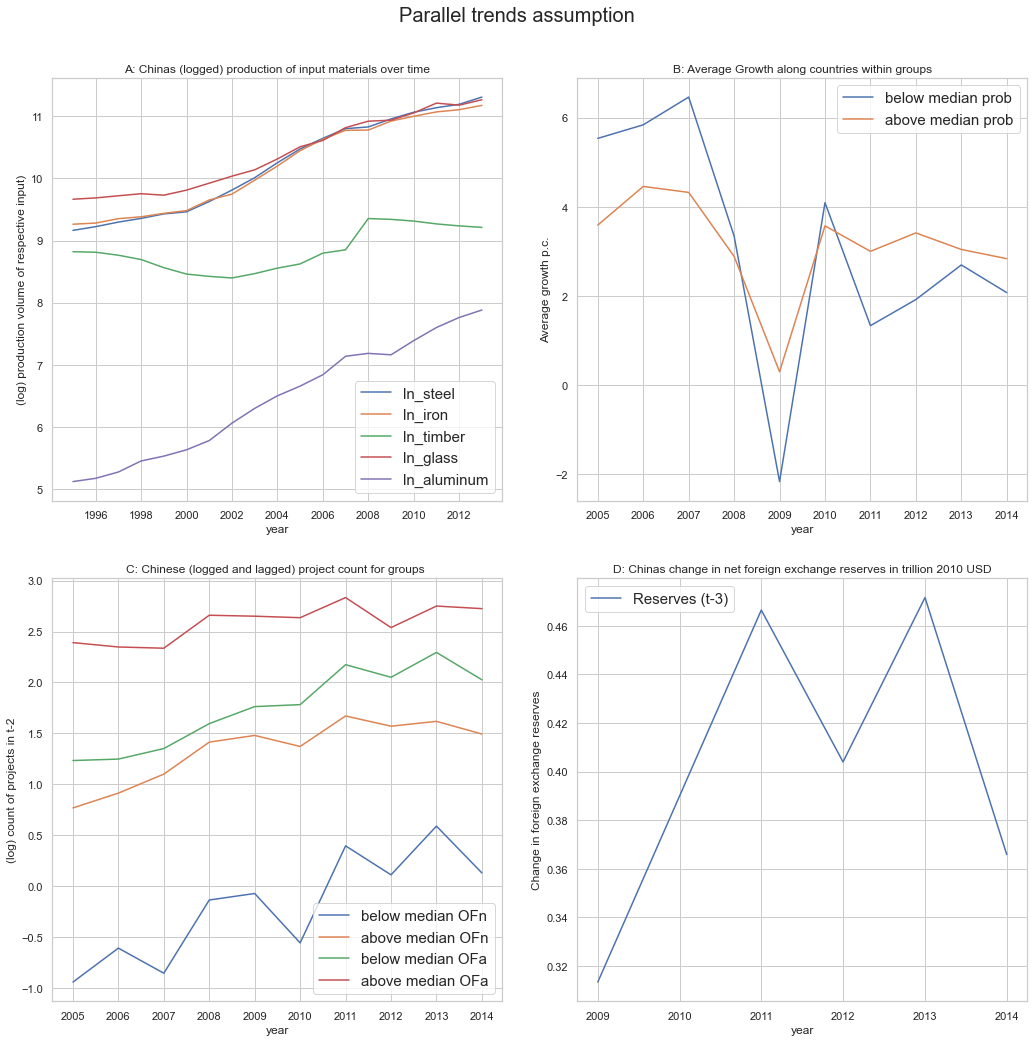

In [31]:
plot_parallel_trends(results_df, data4)

The first plot (A) shows the logged Chinese production of of aluminum (in 10,000 tons), cement (in 10,000 tons), glass (in 10,000 weight cases), iron (in 10,000 tons), steel (in 10,000 tons), and timber (in 10,000 cubic meters) over time. 
The second and the third plot illustrate the group-specific trends in the per capita growth of GDP (B) as well as the number of projects and their financial value (C) for two groups. The groups are defined by having an abov the median probability to receive a project and a probability that lies below the median. The fourth plot 

Looking at this plots, the probabilty specific trends for receiving a Chinese development project as well as the lagged and logged financial value of the projects (C) seem all mostly parallel across the countries grouped by having a above median probability of receiving aid compared to a below median probability of receiving aid. This can also be said about the trend in the growth p.c of the recipient countries, which is also mostly parallel across the groups.

The figure illustrates also  that the Chinese input production (A) as well as the changes in the Chinese foreign reserves (D) do not seem to have a different impact on countries with a high compared to a low probabilty of receiving projects. Therefore the results give no clear reasosn to assume that the parallel trend assumption is violated.


### 3.4 Does Chinese Development Finance Promote Growth?

---
<span style="color:blue">**NOTE**:</span> This time we get the data using the function and setting multiindex equal to True. This gives us the same dataset as before but with an multiindex such that we can apply linearmodels PanelOLS. Please note that the authors used a stata function which enabled them to do the 2SLS in one step. I could not find a function in Python doing the same, so I used PanelOLS and preformd the first- and second stage regression seperatly. Therefore, the computed standard errors of the second stage model are invalid since they do not adjust for using predictions from the first-stage regression
as regressors in the second-stage regression.



---

This time we get the data using the function and setting multiindex equal to True. This gives us the same dataset as before but with an multiindex such that we can apply linearmodels PanelOLS. Please note that the authors used a stata function which enabled them to do the 2SLS in one step. I could not find a function in Python doing the same, so I used PanelOLS and preformd the first- and second stage regression seperatly. Therefore, the computed standard errors of the second stage model are invalid since they do not adjust for using predictions from the first-stage regression
as regressors in the second-stage regression. 

The following regression tables will present the main results of Chinese development finance on growth for the 2002-2016 period. First, we will look at the results when we take $OF_{CHN,i,t-2}$ as the summ of all projects (without distinguishing between project types) and $OF_{CHN,i,t-2}$ as the (log) financial amount of all projects.

The first three columns show the result when we take the summ of all projects (without distinguishing between project types) as  $OF_{CHN,i,t-2}$. The first column shows the results using OLS, the second the first stage regression and the third the second stage regression.

In [32]:
data4 = get_data_4(multiindex = True)

In [33]:
OFn_OFa_all_Table2(data4, table = True)

                                                   Model Comparison                                                   
                                 OLS OFn_all    FS OFn_all    SS OFn_all    OLS OFa_all       FS OFa_all    SS OFa_all
----------------------------------------------------------------------------------------------------------------------
Dep. Variable                      growth_pc     l2OFn_all     growth_pc      growth_pc     l2OFa_all_ln     growth_pc
Estimator                           PanelOLS      PanelOLS      PanelOLS       PanelOLS         PanelOLS      PanelOLS
No. Observations                         774           774           774            774              774           774
Cov. Est.                         Unadjusted     Clustered     Clustered     Unadjusted        Clustered     Clustered
R-squared                             0.0123        0.0276        0.0263         0.0099           0.0128        0.0095
R-Squared (Within)                   -0.0533    

In [34]:
OFn_OFa_oofv_Table2(data4, table = True)

                                                     Model Comparison                                                     
                                 OLS OFn_oofv    FS OFn_oofv    SS OFn_oofv   OLS OFa_oofv       FS OFa_oofv   SS OFa_oofv
--------------------------------------------------------------------------------------------------------------------------
Dep. Variable                       growth_pc     l2OFn_oofv      growth_pc      growth_pc     l2OFa_oofv_ln     growth_pc
Estimator                            PanelOLS       PanelOLS       PanelOLS       PanelOLS          PanelOLS      PanelOLS
No. Observations                          774            774            774            774               774           774
Cov. Est.                          Unadjusted      Clustered      Clustered     Unadjusted         Clustered     Clustered
R-squared                              0.0092         0.0235         0.0154         0.0093            0.0241        0.0155
R-Squared (Withi

In [35]:
OFn_OFa_oda_Table2(data4, table = True)

                                                   Model Comparison                                                   
                                 OLS OFn_oda    FS OFn_oda    SS OFn_oda    OLS OFa_oda       FS OFa_oda    SS OFa_oda
----------------------------------------------------------------------------------------------------------------------
Dep. Variable                      growth_pc     l2OFn_oda     growth_pc      growth_pc     l2OFa_oda_ln     growth_pc
Estimator                           PanelOLS      PanelOLS      PanelOLS       PanelOLS         PanelOLS      PanelOLS
No. Observations                         774           774           774            774              774           774
Cov. Est.                         Unadjusted     Clustered     Clustered     Unadjusted        Clustered     Clustered
R-squared                             0.0144        0.0394        0.0255         0.0113           0.0154        0.0243
R-Squared (Within)                   -0.0479    

As shown in column one and for of each of the regression comparisons (simple PanelOLS model), the number of Chinese governmend financed developmend projects is positively correlated with the growth p.c in the recipient countries. The same holds true when we are looking at financial amounts rather than numbers, but the effect is stacistically weaker as will be discussed in the following.

### Extension - Visual representation of results

In the following, the 90% confidence intervall is routinly plotted and discussed. 

**Keep in mind that we want to detect an effect on growth for the two year lagged measurment of Chinese Official Finance, so growth p.c. has to be interpreted as growth p.c. two years after commitment**

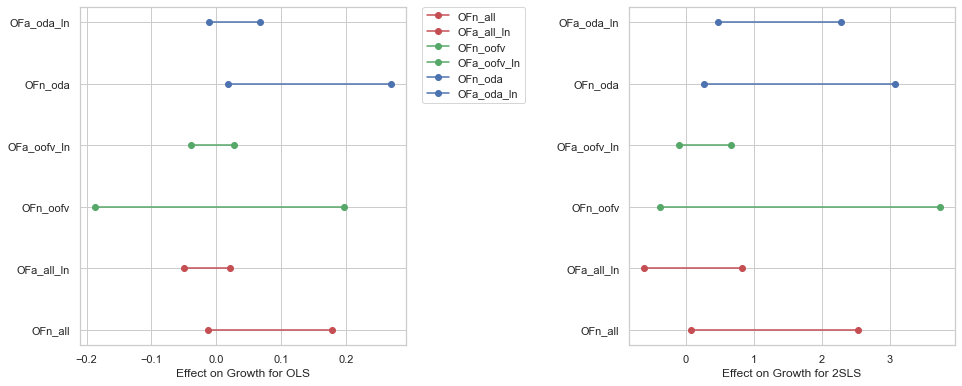

In [36]:
confidence_intervall_plot(data4, 0.1, "standart")

### OLS

Using a 90% confidence intervall, an additional Chinese development finance project (OFn_all) is associated with an growth p.c between 0.07 and 0.23 percentage points. The results are similar when we looking at only the OOF like and vague OOF-like projects (OFn_oofv) as well as the ODA-like defined projects (OFn_oda).
What can be seen in the plot that depicts the CI´s is that an additional OOF-like or vague OOF-like project is associated with more growth than the more stricter ODA-like projects. A doubling of the amount of Chinese OF (OFa_all_ln) to the average recipient country is only associated with a change in growth p.c. between -0.02 to 0.03 percentage points. The effect that the amount has on the growth p.c- remains little, but is again higher for the OOF- and vague OOF-like projects.

### 2SLS

As described in Chapter 3.3, the OLS results in the first column of each regression table are likley to be biased by endogeneity. The second and fith columns of each table represent the first stage regression results and the third and the sisxt columsn the second stage results. 

As expected and stated in Chapter 3.3, the two instruments have positive coefficients in all but one first-stage regressions. This confirms the thesis that increases in the supply of production inputs and reserves have a disproportionally positive effect on projets for countries that receive Chinese support on a more regular basis. 

As can be seen in the third and sixth columns of the tables, it can be seen that additional Chinese financed projects incerase economics growth. This holds not only for the sum of all project types, but also if we look at ODA and OOFV- type projects. Moreover, the effects of Chinese official financing on growth p.c. is overall stronger than what OLS predicted in the biased endogenouos setup. Looking at the confidence level plot and using the numbers obtained from the regressions, an additional Chinese project increases growth by 0.41 to 1,49 percentage points, compared to the 0.07 to .023 percentage point increase that is reported for OLS.
Opposing to the results for OLS, OOF-like and vague OOF-like projects are not associated with more growth compared to the stricter ODA-like projects, as was the case for the OLS model. ODA-like projects on the other hand increase the growth p.c. in a range of 0.69 to 2.21 percentage points, which is a huge increase to the range calculated for OLS.

When looking at financial amounts rather than project numbers (columns 4-6 of each table), the effects are persistent. When the yearly amount of Chinese official finance that a recipient country receives is doubled, it is associated with a 0.05 to 1.33 percentage points increase in growth. The effect on growth that the Chinese development finance in financial terms has is again larger for the development aid in the strict sense, namely ODA-like projects. Chinese OOF and vague OOF-like projects show a point estimate of 0.76, but the plot and the regression iteslf imply a 90% confidence intervall ranging from -0.39 to 1.91 percentage points increase in growth p.c.. But still, this cleary implies a non-zero positive effect on growth.






### Extension - Checking instrument Validity

#### Instrument relevance
Weak isntruments provide only little insight into the variation of the endogenouos variable. In our setting, althought the instruments in all first- stage regressions are not inividually significant at conventional levels, the rule of thumb for weak instruments indicates that our instruments are jointly significant (F- statistic > 10 while looking at the individual regression tables before columnbind them in nice tables for the output). This is also due to the obvious correlation between those instruments (years with high production result in high export surpluses).

#### Overindentifying test

If there is correlation between an instrument and the error term, IV regression is not consistent as pointed out before .Since I had to calculate the 2SLS estimates in two steps, I could not use the functions of linearmodels.iv.results. Unfortunately I could not find another function to check for the exogeneity of the instruments. Therefore, I wrote my own function which test for the overidentifying restriction. 

In [37]:
# calling the regression-outputs of interest
OLS1, FS1, SS1, OLS2, FS2, SS2 = OFn_OFa_all_Table2(data4, table = 0)
OLS1_oofv, FS1_oofv, SS1_oofv, OLS2_oofv, FS2_oofv, SS2_oofv = OFn_OFa_oofv_Table2(data4, table = 0)
OLS1_oda, FS1_oda, SS1_oda, OLS2_oda, FS2_oda, SS2_oda = OFn_OFa_oda_Table2(data4, table = 0)

In [38]:
def OverindentifyingTest_after_Sargan(FS, SS, plot):
    
    """ Function to calculate the Chisquared p value for the overidentifying Test after Sargan for the case when we 
    calculated the 2SLS estimator by performing first- and second-stage regression seperatly. The function was designed
    after Prof. Dr. Horst Rottmann (https://wirtschaftslexikon.gabler.de/definition/sargan-test-52105) and by taking 
    the intuition of Ben Lambert, a research associate at the Imperial College London.
    
    https://wirtschaftslexikon.gabler.de/definition/sargan-test-52105
    https://ben-lambert.com/about/

        Args:
        -------
            FS = first-stage regression model
            SS = second-stage regression model
            plot = boolean, if True we get a plot 

        Returns:
        ---------
            p_value_chi
    """
  
    eps = SS.resids
    variables = FS.model.exog.vars[1:]
    dependent = eps
    exog = data4[variables]
    mod = lm.panel.PanelOLS(dependent, exog, time_effects = True, entity_effects=True).fit()
    
    r_squared = mod.rsquared
    x = np.arange(0, 10, 0.001)
    point = r_squared * SS.resids.shape[0]

    p_value_chi = 1 - scipy.chi2.cdf(point, 1)
    if plot == True:
        f, axs = plt.subplots()

        ax = plt.plot(x, scipy.chi2.pdf(x, df=1))
        ax = plt.axvline(x=point, color= "r", label = "SARG")
        plt.legend()
    
    return(round(p_value_chi,4), round(r_squared,4))

(0.7974, 0.0001)

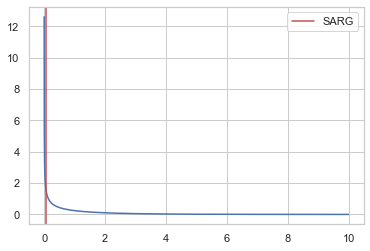

In [39]:
OverindentifyingTest_after_Sargan(FS1, SS1, True)

According to the results, the value for the Chi-squared distributed Sargan teststatistic (computed for OFn_all),

$SARG = n * R^2$,

lies well below all critical values. Following this, we fail to reject the null hypothesis that we have exogenouos instruments. 

When looking at the other resuts for the 2SLS models, we get similar results. The following table also includes the $R^2$ values for the regression of the 2SLS residuals on the exogenouos variables (IV´s and other variables)

In [40]:
def all_p_values():
    
    OLS1, FS1, SS1, OLS2, FS2, SS2 = OFn_OFa_all_Table2(data4, table = 0)
    OLS1_oofv, FS1_oofv, SS1_oofv, OLS2_oofv, FS2_oofv, SS2_oofv = OFn_OFa_oofv_Table2(data4, table = 0)
    OLS1_oda, FS1_oda, SS1_oda, OLS2_oda, FS2_oda, SS2_oda = OFn_OFa_oda_Table2(data4, table = 0)
    
    result = pd.DataFrame(columns = ["p_value", "R_squared"], index=["OFn_all", "OFa_all_ln", "OFn_oofv",
                                                        "OFa_oofv_ln", "OFn_oda", "OFa_oda_ln"])
    for a,b,c in zip([SS1,SS2,SS1_oofv, SS2_oofv, SS1_oda, SS2_oda], [FS1, FS2, FS1_oofv, FS2_oofv, FS1_oda, FS2_oda], result.index):
        pval, rsquared = OverindentifyingTest_after_Sargan(b, a, False)
        result.loc[c,"p_value"] = pval
        result.loc[c,"R_squared"] = rsquared
            
    return(result)
                          
    
    

In [41]:
all_p_values()

,p_value,R_squared
OFn_all,0.7974,0.0001
OFa_all_ln,0.0006,0.0151
OFn_oofv,0.0717,0.0042
OFa_oofv_ln,0.9318,0.0
OFn_oda,0.2126,0.002
OFa_oda_ln,0.18,0.0023


As can be seen by exploring the implemented function for the different models that were setted up depending on the project type and by looking at the last output, the overidentifying restrictions test fails to reject that additional instruments are exogenous.

### Robustness checks

To check the robustness of the results, the authors explore various different specifications of the model. In the following, we explore specifications that control for annual amounts of Chinese outward FDI and the Chinese exports to the recipeint country.
The following tables will therefore check the robustness when we include the mentioned additional control variables.
This specifications account for the potential confounding when physical-input-based movements in Chinese FDI and exports account for differential growth effects in countries that regularly receive Chinese development finance compared to irregular recipients, rather than development finance.

The tables are confirming the previous results for both of the proposed specifications, the effect of Chinese official finance seems even stronger than before


In [42]:
OFn_OFa_all_Table2_robustness(data4, True, ["l2FDI_China_ln"]) #"l2Exports_ln"

                                              Model Comparison                                             
                           SS OFn_all   SS OFn_oofv    SS OFn_oda    SS OFa_all   SS OFa_oofv    SS OFa_oda
-----------------------------------------------------------------------------------------------------------
Dep. Variable               growth_pc     growth_pc     growth_pc     growth_pc     growth_pc     growth_pc
Estimator                    PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                  774           774           774           774           774           774
Cov. Est.                   Clustered     Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0353        0.0252        0.0349        0.0212        0.0254        0.0342
R-Squared (Within)            -0.3012       -0.1568       -0.1819       -0.0953       -0.1446       -0.1748
R-Squared (Between)         

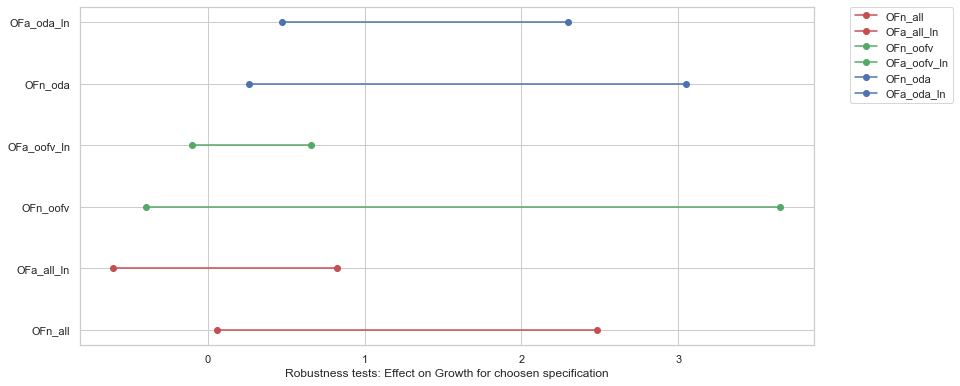

In [44]:
confidence_intervall_plot(data4, 0.1, "l2Exports_ln")

In [45]:
OFn_OFa_all_Table2_robustness(data4, True, ["l2Exports_ln"])

                                              Model Comparison                                              
                           SS OFn_all    SS OFn_oofv    SS OFn_oda    SS OFa_all   SS OFa_oofv    SS OFa_oda
------------------------------------------------------------------------------------------------------------
Dep. Variable               growth_pc      growth_pc     growth_pc     growth_pc     growth_pc     growth_pc
Estimator                    PanelOLS       PanelOLS      PanelOLS      PanelOLS      PanelOLS      PanelOLS
No. Observations                  774            774           774           774           774           774
Cov. Est.                   Clustered      Clustered     Clustered     Clustered     Clustered     Clustered
R-squared                      0.0268         0.0161        0.0260        0.0102        0.0159        0.0252
R-Squared (Within)            -0.2430        -0.1143       -0.1207       -0.0415       -0.0925       -0.1197
R-Squared (Between)

### Literature

* Tracking Underreported Financial Flows 
(TUFF) methodology developed by Strange et al. (2017a, 2017b),
* Interview Prime minister Ethophia ("main reason for turnaround in fate in africa") http://et.china-embassy.org/eng/zagx/t899134.htm


panel ols